## NSGA-III


The algorithm is implemented in base of <cite data-cite="nsga3-part1"></cite> <cite data-cite="nsga3-part2"></cite> [\[benchmark\]](https://www.egr.msu.edu/coinlab/blankjul/pymoo-benchmark/nsga3.html) [\[data\]](https://www.egr.msu.edu/coinlab/blankjul/pymoo-benchmark/nsga3.zip). Implementation details of this algorithm can be found in <cite data-cite="nsga3-norm"></cite>. The reference lines that should be used by this algorithm must be defined before it is executed. Commonly, the Das-Dennis method (implemented in UniformReferenceDirectionFactory) is used to sample reference directions uniformly.

The survival, first, the non-dominated sorting is done as in NSGA-II. 

<div style="display: block;margin-left: auto;margin-right: auto;width: 40%;">
![nsga3_survival_1](../resources/images/nsga3_survival_1.png)
</div>

Second, from the splitting front some solutions need to be selected. NSGA-III fills up the underrepresented reference direction first. If the reference direction does not have any solution assigned, then the solution with the smallest perpendicular distance in the normalized objective space is surviving. In case, a second solution for this reference line is added, it is assigned randomly. 


<div style="display: block;margin-left: auto;margin-right: auto;width: 40%;">
![nsga3_survival_2](../resources/images/nsga3_survival_2.png)
</div>

For this reason, when this algorithm converges each reference line seeks to find a good representative non-dominated solution.

### Example

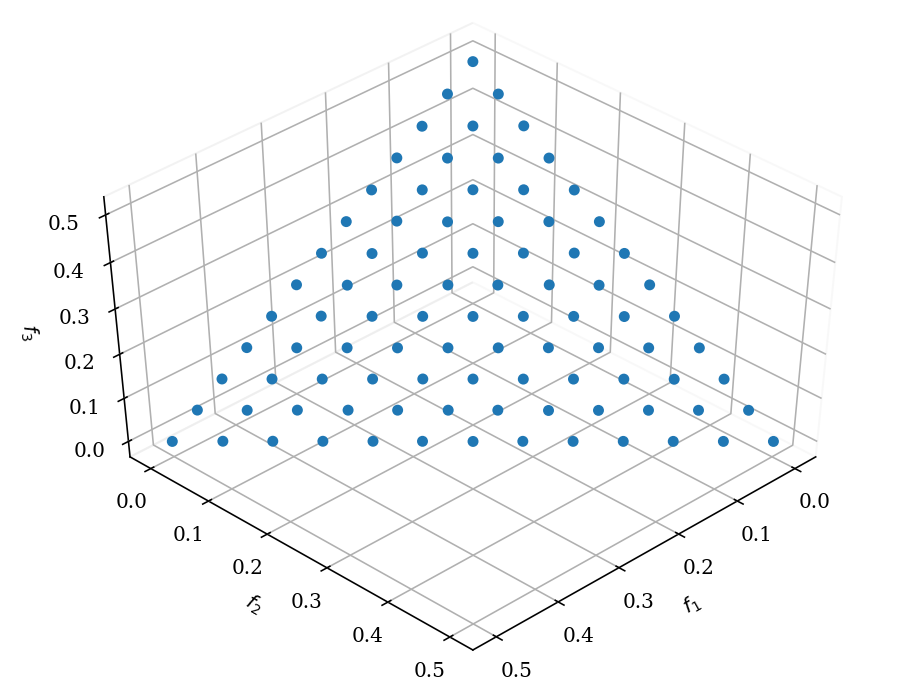

In [1]:
from pymoo.algorithms.nsga3 import nsga3
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import scatter

# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

# create the algorithm object
algorithm = nsga3(pop_size=92,
                  ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("dtlz1"),
               algorithm,
               seed=1,
               termination=('n_gen', 600))

scatter(angle=(45, 45)).add(res.F).show()

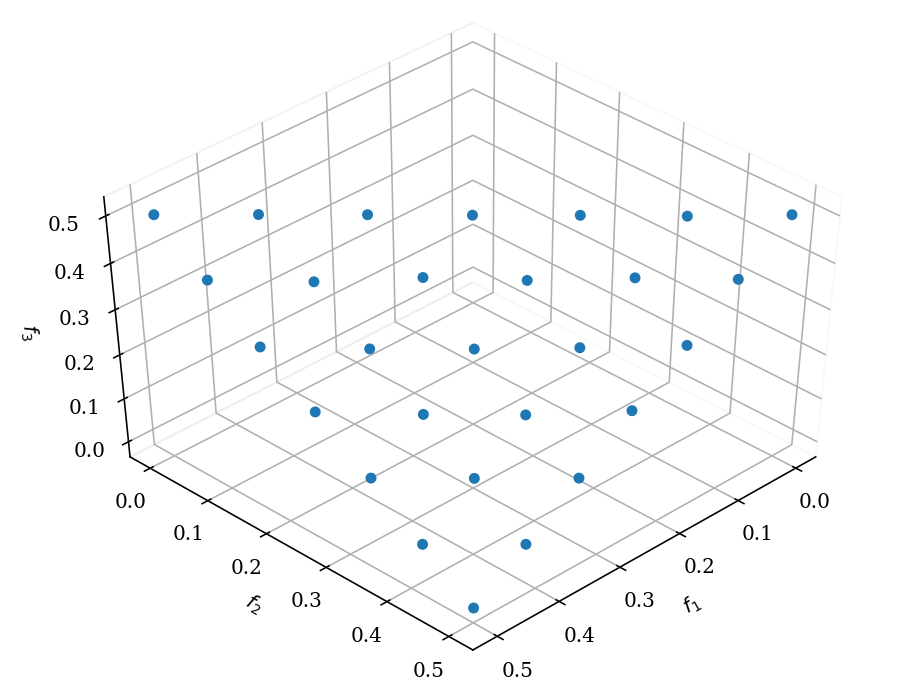

In [2]:
res = minimize(get_problem("dtlz1^-1"),
               algorithm,
               seed=1,
               termination=('n_gen', 600))

scatter(angle=(45, 45)).add(res.F).show()

### API